In [1]:
import dtt2hdf
import vishack.data.diaggui
import numpy as np
import kontrol.model.fit
import importlib
importlib.reload(kontrol.model.fit)
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import control
import kontrol.core.noise
importlib.reload(kontrol.core.noise)
import kontrol.utils
importlib.reload(kontrol.utils)


<module 'kontrol.utils' from '/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9/site-packages/kontrol/utils.py'>

In [2]:
dg = vishack.data.diaggui.Diaggui('data/SR2_IP_noise_20200720a.xml')

f, lvdt_data = dg.psd('K1:VIS-SR2_IP_BLEND_LVDTL_IN1')
_, geo_data = dg.psd('K1:VIS-SR2_IP_BLEND_ACCL_IN1')
_, coh = dg.coh('K1:VIS-SR2_IP_BLEND_LVDTL_IN1', 'K1:VIS-SR2_IP_BLEND_ACCL_IN1')



In [3]:
lvdt_noise_log = kontrol.core.noise.Noise(f=f, asd=lvdt_data, coh=coh, label='SR2 LVDT noise with log parameters')
# lvdt_noise_log.weight = 1/lvdt_noise_log.f
# lvdt_noise = kontrol.core.noise.Noise(f=f, asd=lvdt_data, coh=coh, label='SR2 LVDT noise without log parameters')
# lvdt_noise.log_params=False
# lvdt_noise.weight = 1/lvdt_noise.f

In [4]:
lvdt_noise_log.fit(order_bound=(5,10), nfits=3)
# lvdt_noise.fit(order_bound=(5,5), nfits=3)

/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


In [5]:
lvdt_noise_log.all_fit_results

[[     fun: 1.291853075131476e-06
   message: 'Optimization terminated successfully.'
      nfev: 76242
       nit: 461
   success: True
         x: array([-1.05069435, -1.09322845,  1.3172761 , -1.08549321, -1.01630386,
         -1.62076557,  1.17105363, -1.63935943, -1.68927835, -1.67399675,
          0.79027223]),
       fun: 1.2897419212743174e-06
   message: 'Optimization terminated successfully.'
      nfev: 78057
       nit: 472
   success: True
         x: array([-1.05661479,  1.58844119, -1.01400772, -1.09521467, -1.07937729,
         -1.66078228,  1.20389476, -1.65567084, -1.61287605, -1.68037039,
          0.78974344]),
       fun: 1.4421317673246422e-06
   message: 'Optimization terminated successfully.'
      nfev: 34662
       nit: 209
   success: True
         x: array([-0.93348506, -0.94581919, -0.9037008 ,  1.9804882 ,  1.08097562,
          1.09771835, -1.74553267,  1.69386045, -1.75163472, -1.73436797,
          0.80958244])],
 [     fun: 1.27973125169559e-06
   mess

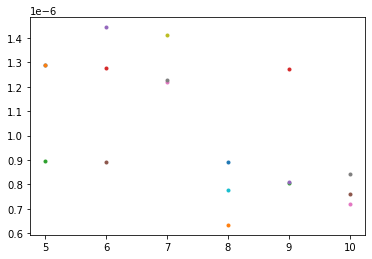

In [5]:
order = np.arange(5,11,1)
for i in range(len(lvdt_noise_log._costs)):
    for j in range(len(lvdt_noise_log._costs[i])):
        plt.plot(order[i], lvdt_noise_log._costs[i][j], '.')

In [33]:
order

array([5, 6, 7, 8, 9])

In [22]:
lvdt_noise_log.all_fit_results[0]

[     fun: 1.291853075131476e-06
  message: 'Optimization terminated successfully.'
     nfev: 76242
      nit: 461
  success: True
        x: array([-1.05069435, -1.09322845,  1.3172761 , -1.08549321, -1.01630386,
        -1.62076557,  1.17105363, -1.63935943, -1.68927835, -1.67399675,
         0.79027223]),
      fun: 1.2897419212743174e-06
  message: 'Optimization terminated successfully.'
     nfev: 78057
      nit: 472
  success: True
        x: array([-1.05661479,  1.58844119, -1.01400772, -1.09521467, -1.07937729,
        -1.66078228,  1.20389476, -1.65567084, -1.61287605, -1.68037039,
         0.78974344]),
      fun: 1.4421317673246422e-06
  message: 'Optimization terminated successfully.'
     nfev: 34662
      nit: 209
  success: True
        x: array([-0.93348506, -0.94581919, -0.9037008 ,  1.9804882 ,  1.08097562,
         1.09771835, -1.74553267,  1.69386045, -1.75163472, -1.73436797,
         0.80958244])]

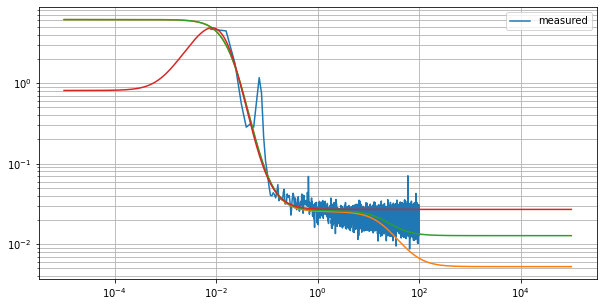

In [20]:
_f = np.logspace(-5,5, 100000)
plt.figure(figsize=(10,5))
plt.loglog(lvdt_noise_log.f, lvdt_noise_log.asd, label='measured')
# plt.loglog(lvdt_noise.f, lvdt_noise.asd_fit, label=lvdt_noise.label)
# plt.loglog(lvdt_noise_log.f, lvdt_noise_log.asd_fit, label=lvdt_noise_log.label)
for tf in lvdt_noise_log.all_tf[0]:
    plt.loglog(_f, abs(tf.horner(2*np.pi*1j*_f)[0][0]))
#     break
plt.legend(loc=0)
plt.grid(which='both')

In [20]:
# lvdt_vinagre_noise = kontrol.core.noise.Noise(f=f, asd=geo_data, coh=coh, label='SR2 LVDT noise fit with special vinagre\'s weight')
# lvdt_vinagre_noise.weight = kontrol.model.fit.vinagre_weight(lvdt_vinagre_noise.f)
lvdt_oneoverf_noise = kontrol.core.noise.Noise(f=f, asd=lvdt_data, coh=coh, label='SR2 LVDT noise fit with 1/f weight')
lvdt_oneoverf_noise.weight = 1/lvdt_oneoverf_noise.f
lvdt_oneoverf_normalized_noise = kontrol.core.noise.Noise(f=f, asd=lvdt_data, coh=coh, label='SR2 LVDT noise fit with normalized 1/f weight')
lvdt_oneoverf_normalized_noise.weight = (1/lvdt_oneoverf_noise.f/max(1/lvdt_oneoverf_noise.f))
lvdt_oneoverf_boosted_noise = kontrol.core.noise.Noise(f=f, asd=lvdt_data, coh=coh, label='SR2 LVDT noise fit with 1/f weight')
lvdt_oneoverf_boosted_noise.weight = 1/lvdt_oneoverf_noise.f*1e6

In [21]:
# lvdt_noise.fit(order_bound=(4,5), nfits=2)
# lvdt_vinagre_noise.fit(order_bound=(4,5), nfits=2)
lvdt_oneoverf_noise.fit(order_bound=(5,5), nfits=5)
lvdt_oneoverf_normalized_noise.fit(order_bound=(5,5), nfits=5)
lvdt_oneoverf_boosted_noise.fit(order_bound=(5,5), nfits=5)

/home/terrencetec/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


In [15]:
lvdt_oneoverf_normalized_noise.fit_results

     fun: 1.529419370959504e-06
 message: 'Optimization terminated successfully.'
    nfev: 84822
     nit: 513
 success: True
       x: array([ 0.71427724, -1.13764998, -0.7536671 ,  0.66503923,  0.50046799,
       -2.05668311, -2.02060891, -2.00047815, -1.94965978, -0.56584529,
        2.98645706])

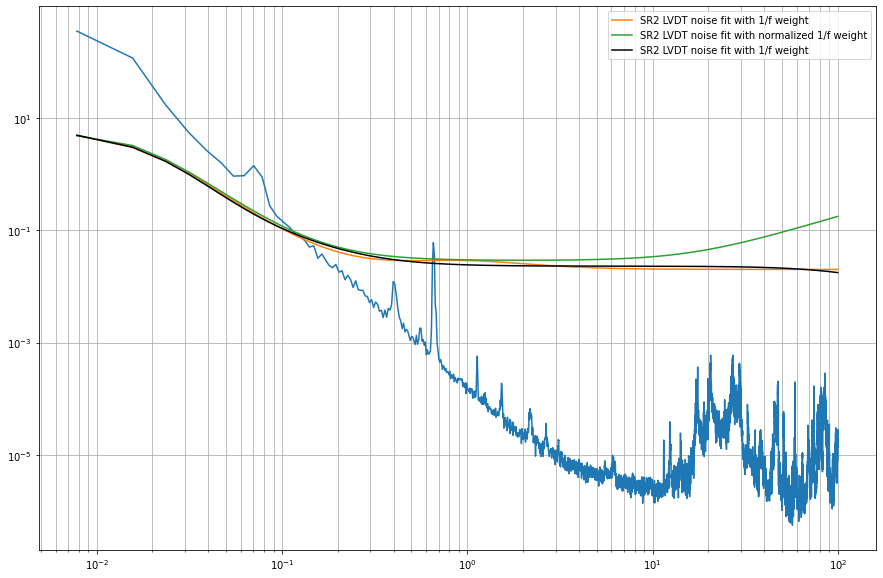

In [22]:
plt.figure(figsize=(15,10))
plt.loglog(lvdt_noise.f, lvdt_noise.asd)
# plt.loglog(lvdt_noise.f, lvdt_noise.asd_fit, label=lvdt_noise.label)
# plt.loglog(lvdt_noise.f, lvdt_vinagre_noise.asd_fit, label=lvdt_vinagre_noise.label)
plt.loglog(lvdt_noise.f, lvdt_oneoverf_noise.asd_fit, label=lvdt_oneoverf_noise.label)
plt.loglog(lvdt_noise.f, lvdt_oneoverf_normalized_noise.asd_fit, label=lvdt_oneoverf_normalized_noise.label)
plt.loglog(lvdt_noise.f, lvdt_oneoverf_boosted_noise.asd_fit, label=lvdt_oneoverf_boosted_noise.label, color='k')
plt.legend(loc=0)
plt.grid(which='both')

In [6]:
weight = np.ones_like(lvdt_noise.f)
lvdt_noise.weight=weight
lvdt_noise.fit(order_bound=(4,5), nfits=1,)
weight = kontrol.model.fit.vinagre_weight(omega=lvdt_noise.f)
lvdt_noise.fit(order_bound=(4,5), nfits=1,)
# geophone_noise.fit(order_bound=(4,5), nfits=1,)

/home/terrencetec/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


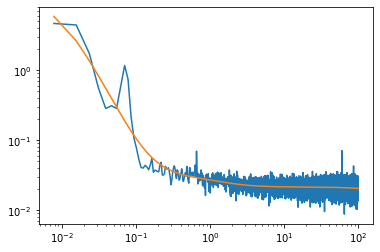

In [7]:
plt.loglog(lvdt_noise.f, lvdt_noise.asd)
plt.loglog(lvdt_noise.f, lvdt_noise.asd_fit)
# plt.loglog(geophone_noise.f, geophone_noise.asd)
# plt.loglog(geophone_noise.f, geophone_noise.asd_fit)

In [111]:
import kontrol.filter.optimize
importlib.reload(kontrol.filter.optimize)

<module 'kontrol.filter.optimize' from '/home/terrencetec/.conda/envs/kontrol/lib/python3.8/site-packages/kontrol/filter/optimize.py'>

In [145]:
h1h2,h2h2 = kontrol.filter.optimize.h2complementary(lvdt_noise.tf/geophone_noise.tf, geophone_noise.tf/lvdt_noise.tf)
h1hinf,h2hinf = kontrol.filter.optimize.hinfcomplementary(lvdt_noise.tf/geophone_noise.tf, geophone_noise.tf/lvdt_noise.tf)

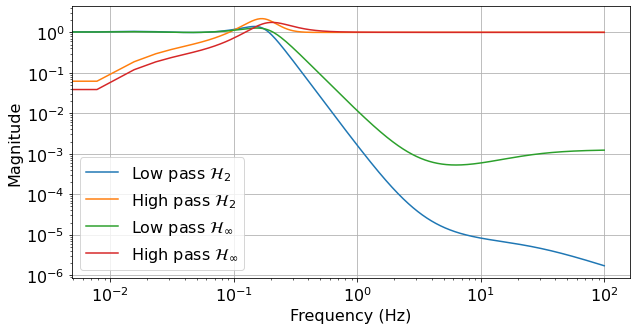

In [147]:
plt.figure(figsize=(10,5))
plt.loglog(f, abs(h1h2.horner(2*np.pi*1j*f)[0][0]), label='Low pass $\mathcal{H}_2$')
plt.loglog(f, abs(h2h2.horner(2*np.pi*1j*f)[0][0]), label='High pass $\mathcal{H}_2$')
plt.loglog(f, abs(h1hinf.horner(2*np.pi*1j*f)[0][0]), label='Low pass $\mathcal{H}_\infty$')
plt.loglog(f, abs(h2hinf.horner(2*np.pi*1j*f)[0][0]), label='High pass $\mathcal{H}_\infty$')
plt.legend(loc=0)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.grid()

In [125]:
h2.zero()/2/np.pi

array([-4.37952073e+07+0.j        , -2.46551578e+01+0.j        ,
       -2.46381216e+01+0.j        , -1.24520816e+00+0.j        ,
       -1.24406819e+00+0.j        , -7.70203625e-01+0.j        ,
       -7.67890414e-01+0.j        , -2.30566443e-01+0.21887917j,
       -2.30566443e-01-0.21887917j, -3.00627166e-01+0.j        ,
       -1.92011271e-01+0.j        , -1.31729642e-01+0.j        ,
       -1.07481713e-01+0.j        , -9.51942502e-02+0.j        ,
       -1.96890127e-02+0.j        , -1.31308012e-02+0.00308895j,
       -1.31308012e-02-0.00308895j, -1.21901603e-03+0.0031772j ,
       -1.21901603e-03-0.0031772j ])

In [122]:
from kontrol import quad_sum

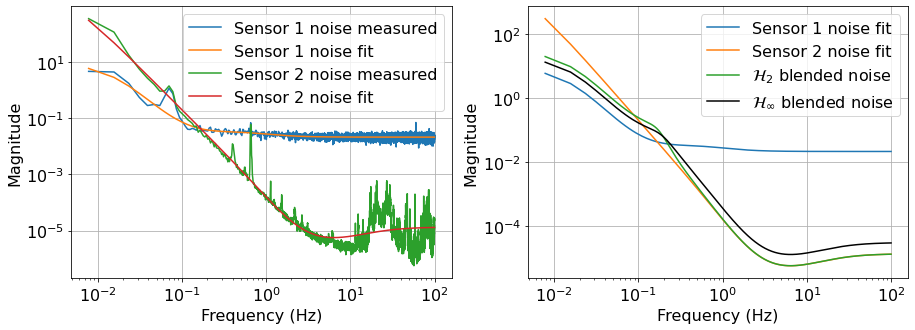

In [152]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(lvdt_noise.f, lvdt_noise.asd, label='Sensor 1 noise measured')
plt.loglog(lvdt_noise.f, lvdt_noise.asd_fit, label='Sensor 1 noise fit')
plt.loglog(geophone_noise.f, geophone_noise.asd, label='Sensor 2 noise measured')
plt.loglog(geophone_noise.f, geophone_noise.asd_fit, label='Sensor 2 noise fit')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()
plt.subplot(122)
plt.loglog(lvdt_noise.f, lvdt_noise.asd_fit, label='Sensor 1 noise fit')
plt.loglog(geophone_noise.f, geophone_noise.asd_fit, label='Sensor 2 noise fit')
plt.loglog(geophone_noise.f,
           quad_sum(abs(h1h2.horner(2*np.pi*1j*geophone_noise.f)[0][0])*lvdt_noise.asd_fit,abs(h2h2.horner(2*np.pi*1j*geophone_noise.f)[0][0])*geophone_noise.asd_fit), label='$\mathcal{H}_2$ blended noise')
plt.loglog(geophone_noise.f,
           quad_sum(abs(h1hinf.horner(2*np.pi*1j*geophone_noise.f)[0][0])*lvdt_noise.asd_fit,abs(h2hinf.horner(2*np.pi*1j*geophone_noise.f)[0][0])*geophone_noise.asd_fit), color='k', label='$\mathcal{H}_\infty$ blended noise')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

In [167]:
a=control.tf([1,2,3],[1,2,4])

In [169]:
b = control.TransferFunction(a)

In [170]:
b


s^2 + 2 s + 3
-------------
s^2 + 2 s + 4

In [171]:
import kontrol.core.transfer_function

In [181]:
a = kontrol.core.transfer_function.TransferFunction([1],[2,3])

In [182]:
type(a)

kontrol.core.transfer_function.TransferFunction

In [120]:
h2.damp()

(array([2.75521199e+08, 1.54806897e+02, 1.54804881e+02, 7.81926032e+00,
        7.81530684e+00, 4.84183746e+00, 4.83507533e+00, 1.18822382e+00,
        1.18822382e+00, 1.41967775e+00, 1.41967775e+00, 1.54792133e+00,
        1.54792133e+00, 1.57905975e+00, 1.34748504e-01, 1.19548501e-01,
        1.19548501e-01, 7.67112056e-02, 7.67112056e-02]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.41941003, 0.41941003, 0.81822697,
        0.81822697, 0.96835159, 0.96835159, 1.        , 1.        ,
        0.95979176, 0.95979176, 0.98544214, 0.98544214]),
 array([-2.75521199e+08+0.j        , -1.54806897e+02+0.j        ,
        -1.54804881e+02+0.j        , -7.81926032e+00+0.j        ,
        -7.81530684e+00+0.j        , -4.84183746e+00+0.j        ,
        -4.83507533e+00+0.j        , -4.98352982e-01+1.07866591j,
        -4.98352982e-01-1.07866591j, -1.16161863e+00+0.81616609j,
        -1.16161863e+00-0.81616609j, -1.49893209e+00+0.3863457

In [82]:
h2


  s^20 + 343.7 s^19 + 3.501e+04 s^18 + 9.732e+05 s^17 + 1.307e+07 s^16 + 1.024e+08 s^15 + 5.138e+08 s^14 + 1.75e+09 s^13 + 4.222e+09 s^12 + 7.39e+09 s^11 + 9.434e+09 s^10 + 8.66e+09 s^9 + 5.545e+09 s^8 + 2.371e+09 s^7 + 6.408e+08 s^6 + 1.034e+08 s^5 + 9.756e+06 s^4 + 5.297e+05 s^3 + 1.592e+04 s^2 + 244.4 s + 1.492
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
s^20 + 343.7 s^19 + 3.501e+04 s^18 + 9.732e+05 s^17 + 1.308e+07 s^16 + 1.025e+08 s^15 + 5.144e+08 s^14 + 1.757e+09 s^13 + 4.275e+09 s^12 + 7.653e+09 s^11 + 1.029e+10 s^10 + 1.047e+10 s^9 + 7.987e+09 s^8 + 4.444e+09 s^7 + 1.712e+09 s^6 + 4.266e+08 s^5 + 6.733e+07 s^4 + 6.664e+06 s^3 + 4.006e+05 s^2 + 1.337e+04 s + 190

In [67]:
geophone_noise._costs

[[0.0016846565848069415,
  0.001684660856267308,
  0.0016846606173210221,
  0.0016846597046818138,
  0.0016846574091361518],
 [0.00031117447039992046,
  0.0003112484098468219,
  0.00031111089676955534,
  0.00031131305986711535,
  0.000311134711795429],
 [0.00021338903722062805,
  0.00021336547673390257,
  0.00021338129022455824,
  0.00021337036842501974,
  0.00021354368652598234],
 [0.00018619170086007632,
  0.00018640767480992165,
  0.0003081546964840931,
  0.00020947087015151848,
  0.0001861446856192552],
 [0.00017857948340118678,
  0.00018603376345511006,
  0.0001776013317113586,
  0.00017777179800039684,
  0.00020425868082073515],
 [0.00017892804256779038,
  0.00017728221868278462,
  0.00019347587715083593,
  0.00018591964637315822,
  0.00018536857650183145]]

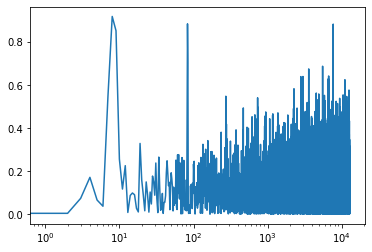

In [3]:
plt.semilogx(coh)

In [17]:
def args2tf(args, f, data):
    s = 2*np.pi*1j*f
    if np.mod(len(args), 2) == 0:
        raise ValueError('Number of arguments must be odd')
    args = np.power(np.ones_like(args)*10, args)
    zeros = args[0:np.int(np.floor(len(args)/2))]
    poles = args[np.int(np.floor(len(args)/2)):len(args)-1]
    gain = args[-1]
    
    tf_fit = gain
    for z in zeros:
        tf_fit *= (s/(2*np.pi*z) + 1)
    for p in poles:
        tf_fit /= (s/(2*np.pi*p) + 1)
    return(tf_fit)

def args2control_tf(args, f, data):
    if np.mod(len(args), 2) == 0:
        raise ValueError('Number of arguments must be odd')
    args = np.power(np.ones_like(args)*10, args)
    zeros = args[0:np.int(np.floor(len(args)/2))]
    poles = args[np.int(np.floor(len(args)/2)):len(args)-1]
    gain = args[-1]
    
    tf_fit = control.tf([gain],[1])
    s = control.tf('s')
    for z in zeros:
        tf_fit *= (s/(2*np.pi*z) + 1)
    for p in poles:
        tf_fit /= (s/(2*np.pi*p) + 1)
    return(tf_fit.horner(2*np.pi*1j*f)[0][0])

def cost(args, f, data, weight):
    tf_fit = args2tf(args, f, data)
    cost_ = np.sqrt(np.sum(((np.log10(np.abs(tf_fit))-np.log10(data))*weight)**2))
    return(cost_)

def cost_control(args, f, data, weight):
    tf_fit = args2control_tf(args, f, data)
    cost_ = np.sqrt(np.sum(((np.log10(np.abs(tf_fit))-np.log10(data))*weight)**2))
    return(cost_)

In [132]:
%%time
np.abs(tf_fit)

CPU times: user 790 µs, sys: 0 ns, total: 790 µs
Wall time: 815 µs


array([3.51222766e+03, 3.51222745e+03, 3.51222724e+03, ...,
       1.32804976e-05, 1.32804976e-05, 1.32804976e-05])

In [18]:
def fit(cost, order, f, data, weight, bounds=None):
    np.random.seed()
    if bounds is None:
#         bounds = [(min(f)*1e-1, max(f)*1e1)] * 2 * order
#         bounds.append((min(data)*1e-1, max(data)*1e1))
        bounds = [(np.log10(min(f))-1, np.log10(max(f))+1)] * 2 * order
        bounds.append((np.log10(min(data))-1, np.log10(max(data))+1))
#     x0 = np.random.choice(np.logspace(np.log10(bounds[0][0]), np.log10(bounds[0][1]), len(f)), order*2)
#     gain_x0 = np.random.choice(np.logspace(np.log10(bounds[-1][0]), np.log10(bounds[-1][1]), len(f)), 1)
    bounds = np.array(bounds)
    x0 = np.random.choice(np.linspace(bounds[0][0], bounds[0][1], len(f)), order*2)
    gain_x0 = np.random.choice(np.linspace(bounds[-1][0], bounds[-1][1], len(f)), 1)
    x0 = np.append(x0, gain_x0)
    options = {
        'disp': True,
        'ftol': 1e-4,
        'maxfev': len(bounds)*1e5
    }
    res = minimize(cost, args=(f, data, weight), bounds=bounds, x0=x0, method='Powell', options=options)
    return(res, order)
    
    

In [128]:
for i, order in zip(range(10), range(1,11)):
    print('{i}, {order}, {i}'.format(i=i, order=order))

0, 1, 0
1, 2, 1
2, 3, 2
3, 4, 3
4, 5, 4
5, 6, 5
6, 7, 6
7, 8, 7
8, 9, 8
9, 10, 9


In [19]:
from scipy.optimize import differential_evolution

In [20]:
def fit_differential_evolution(cost, order, f, data, weight, bounds=None):
    np.random.seed()
    if bounds is None:
#         bounds = [(min(f)*1e-1, max(f)*1e1)] * 2 * order
#         bounds.append((min(data)*1e-1, max(data)*1e1))
        bounds = [(np.log10(min(f))-1, np.log10(max(f))+1)] * 2 * order
        bounds.append((np.log10(min(data))-1, np.log10(max(data))+1))
#     x0 = np.random.choice(np.logspace(np.log10(bounds[0][0]), np.log10(bounds[0][1]), len(f)), order*2)
#     gain_x0 = np.random.choice(np.logspace(np.log10(bounds[-1][0]), np.log10(bounds[-1][1]), len(f)), 1)
    x0 = np.random.choice(np.linspace(bounds[0][0], bounds[0][1], len(f)), order*2)
    gain_x0 = np.random.choice(np.linspace(bounds[-1][0], bounds[-1][1], len(f)), 1)
    x0 = np.append(x0, gain_x0)
    options = {
        'disp': True,
        'ftol': 1e-8,
        'maxfev': len(bounds)*1e5
    }
    res = differential_evolution(cost, args=(f, data, weight), bounds=bounds, workers=-1)
    return(res, order)

In [21]:
def vinagre_weight(omega, normalize=True, log=True):
    weight=np.ones_like(omega)
    for p in range(len(omega)):
        if p == 0:
            weight[p] = (omega[1]-omega[0])/(2*omega[0]**2)
        elif p == len(omega)-1:
            weight[p] = (omega[p]-omega[p-1])/(2*omega[p]**2)
        else:
            weight[p] = (omega[p+1]-omega[p-1])/(2*omega[p]**2)
    if log:
        weight = np.log10(weight) - min(np.log10(weight))
    if normalize:
        weight /= max(weight)
    return(weight)

def make_weight_from_coh(coh, threshold, invert=False):
    weight = np.ones_like(coh)
    weight = coh>threshold
    if invert:
        weight = weight==0
    return(weight)

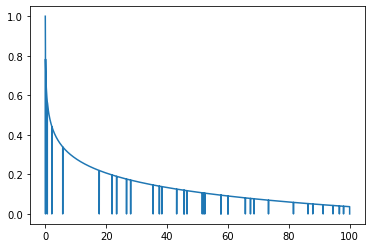

In [24]:
coh_weight = make_weight_from_coh(coh, 0.5, invert=True)
v_weight = vinagre_weight(f)
weight = coh_weight.astype(int) * v_weight
# plt.semilogx(f,coh)
# plt.semilogx(f,v_weight)
# plt.semilogx(f,coh_weight)
plt.plot(f,weight)

In [25]:
%%time
for _ in range(1):
    res, order = fit_differential_evolution(cost, 4, f, data, weight)
    print(res.fun)

/home/terrencetec/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


1.5050273426446892
CPU times: user 9.47 s, sys: 1.96 s, total: 11.4 s
Wall time: 23.5 s


In [26]:
res.fun

1.5050273426446892

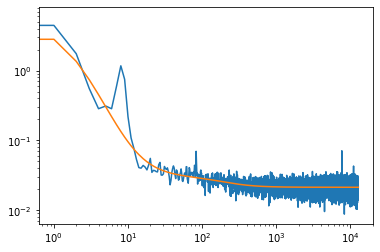

In [27]:
plt.loglog(data)
plt.loglog(abs(args2tf(res.x, f, data)))

In [8]:
%%time
import concurrent.futures
max_order = 10
ntrial = 1
fit_results = []
orders = []
# with concurrent.futures.ProcessPoolExecutor() as executor:
#         results = [executor.submit(
#             _multigen, size,
#             bound_of_simple_zeros,
#             bound_of_simple_poles,
#             bound_of_complex_zeros,
#             bound_of_complex_poles,
#             max_q,
#             strictly_proper,
#             snr,
#             navg) for _ in range(nsample)]

#         for f in concurrent.futures.as_completed(results):
#             one_zero_and_pole, one_transfer_function = f.result()
#             zero_and_pole.append(one_zero_and_pole)
#             transfer_function.append(one_transfer_function)

with concurrent.futures.ProcessPoolExecutor() as executor:
    results = []
    for order in range(0, max_order+1):
        for _ in range(ntrial):
            results.append(executor.submit(fit, cost, order ,f, data, weight))
    for f in concurrent.futures.as_completed(results):
            fit_result, order = f.result()
            fit_results.append(fit_result)
            orders.append(order)

Optimization terminated successfully.
Optimization terminated successfully.Optimization terminated successfully.         Current function value: 24.073358
         Iterations: 2Optimization terminated successfully.Optimization terminated successfully.




Optimization terminated successfully.Optimization terminated successfully.         Current function value: 24.073358Optimization terminated successfully.
         Current function value: 24.073358         Function evaluations: 20


         Current function value: 24.073358

         Current function value: 24.073358         Current function value: 24.073358         Iterations: 2         Current function value: 24.073358


         Iterations: 2
         Current function value: 24.073358
         Iterations: 2         Function evaluations: 20


         Function evaluations: 20         Iterations: 2         Function evaluations: 20

         Function evaluations: 20
         Iterations: 2
         Function evaluations: 44
         Ite

Optimization terminated successfully.
         Current function value: 8.591833
         Iterations: 62
         Function evaluations: 23566
Optimization terminated successfully.
         Current function value: 8.852756
         Iterations: 96
         Function evaluations: 47462
Optimization terminated successfully.
         Current function value: 14.670300
         Iterations: 22
         Function evaluations: 10816
Optimization terminated successfully.
         Current function value: 11.969031
         Iterations: 103
         Function evaluations: 59769
Optimization terminated successfully.
         Current function value: 8.565841
         Iterations: 161
         Function evaluations: 68224
Optimization terminated successfully.
         Current function value: 8.976424
         Iterations: 111
         Function evaluations: 69995
Optimization terminated successfully.
         Current function value: 8.338383
         Iterations: 112
         Function evaluations: 37174
Optimiz

         Function evaluations: 68896
Optimization terminated successfully.
         Current function value: 8.830127
         Iterations: 292
         Function evaluations: 231636
Optimization terminated successfully.
         Current function value: 9.054412
         Iterations: 153
         Function evaluations: 121059
Optimization terminated successfully.
         Current function value: 8.189016
         Iterations: 93
         Function evaluations: 40389
Optimization terminated successfully.
         Current function value: 10.087148
         Iterations: 92
         Function evaluations: 76483
Optimization terminated successfully.
         Current function value: 8.521222
         Iterations: 104
         Function evaluations: 50127
Optimization terminated successfully.
         Current function value: 9.238926
         Iterations: 146
         Function evaluations: 111986
Optimization terminated successfully.
         Current function value: 9.951881
         Iterations: 40
     

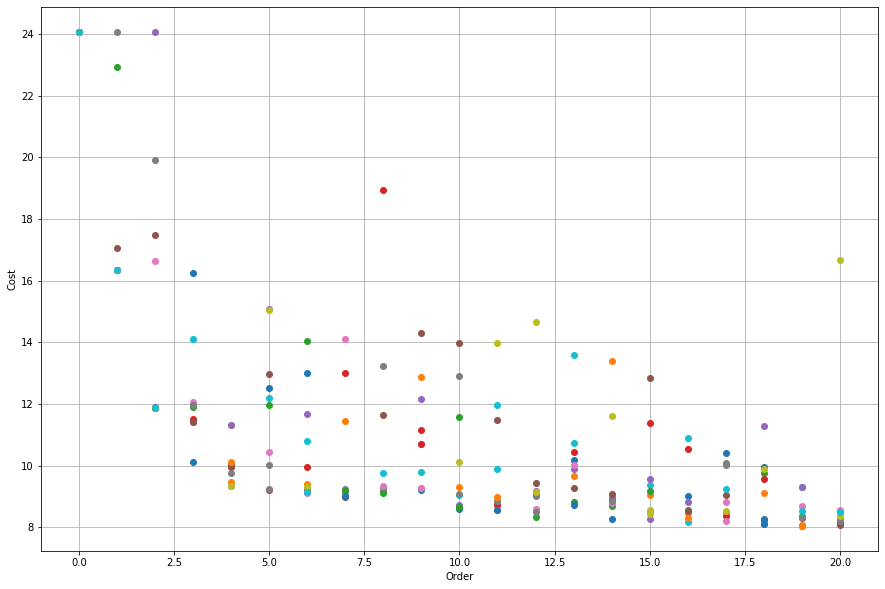

In [14]:
plt.figure(figsize=(15,10))
for i in range(len(fit_results)):
    plt.plot(orders[i], fit_results[i].fun, 'o')

plt.ylabel('Cost')
plt.xlabel('Order')
plt.grid()

In [13]:
fit_results

[   direc: array([[1.]])
      fun: 24.073357682542024
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
   status: 0
  success: True
        x: array([-4.64411768]),
    direc: array([[1.]])
      fun: 24.073357682542024
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
   status: 0
  success: True
        x: array([-4.64411768]),
    direc: array([[1.]])
      fun: 24.073357682542024
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
   status: 0
  success: True
        x: array([-4.64411768]),
    direc: array([[ 0.08511298,  0.17230924, -0.37070818,  0.28737078,  0.15664633],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
        [ 0.05197003,  0.72863053,  0.5080916 ,  0.11104613,  0.08116395],
        [-0.32157772, -0.15855635, -0.48825404, -0.10113789,  0.24652661],
        [-0.74171195,  0.20131375, -0.62614319, -0.72816624,  0.72261459]])
      fun: 16.391670202887134

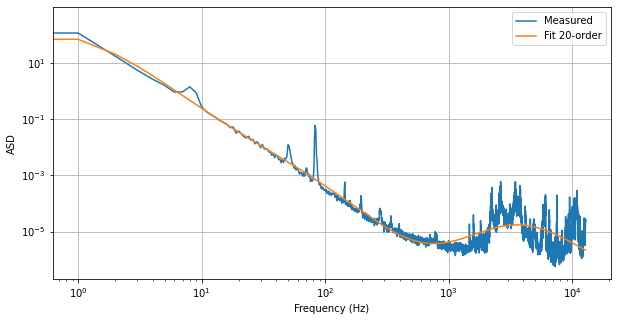

In [15]:
plt.figure(figsize=(10,5))
plt.loglog(data, label='Measured')
plt.loglog(abs(args2tf(fit_results[-5].x, f, data)), label='Fit 20-order')
plt.ylabel('ASD')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

In [16]:
type(fit_results)

list

In [17]:
reordered_orders = []
reordered_fit_results = []
for order in range(0, max_order+1):
    for i in range(len(orders)):
        if orders[i] == order:
            reordered_orders.append(orders[i])
            reordered_fit_results.append(fit_results[i])

In [32]:
average_costs = []
best_costs = []
for order in range(0, max_order+1):
    bufferlist = []
    for i in range(len(reordered_orders)):
        if reordered_orders[i] == order:
            bufferlist.append(reordered_fit_results[i].fun)
    average_costs.append(np.mean(bufferlist))
    best_costs.append(np.min(bufferlist))


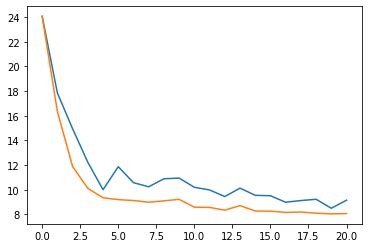

In [33]:
plt.plot(average_costs)
plt.plot(best_costs)

In [34]:
best_costs

[24.07335768231007,
 16.343082998470067,
 11.880649235602874,
 10.108877984017237,
 9.343799285243051,
 9.193277685681137,
 9.12284656488686,
 8.98456362163293,
 9.095846468598552,
 9.217238517883912,
 8.58245909341,
 8.562534795745993,
 8.338383234682444,
 8.709038635175652,
 8.27042764256053,
 8.258686671149412,
 8.155879193154682,
 8.189016053015807,
 8.095218630340533,
 8.035405707779582,
 8.066322242802915]

In [39]:
for fit_results in reordered_fit_results[40:50]:
    print(fit_results.fun)
    

11.31134957266691
9.480363254679268
9.344834335714898
9.948461432927672
11.313263604867307
10.025878360871568
9.344729371433624
9.770757910245944
9.343799285243051
10.102942532091014


In [35]:
reordered_orders.index(8)

80

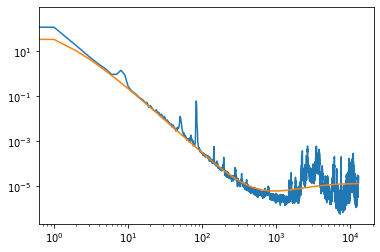

In [41]:
plt.loglog(data)
plt.loglog(abs(args2tf(reordered_fit_results[48].x, f, data)))

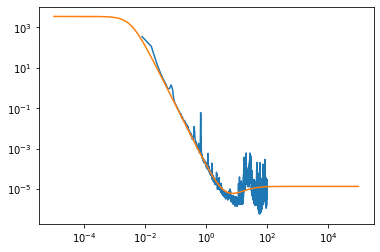

In [49]:
ff = np.logspace(-5,5,10000)
tf_fit = args2control_tf(reordered_fit_results[48].x, ff, data)
# ff = np.logspace(-5,5, 10000)
plt.loglog(f, data)
plt.loglog(ff, abs(tf_fit))

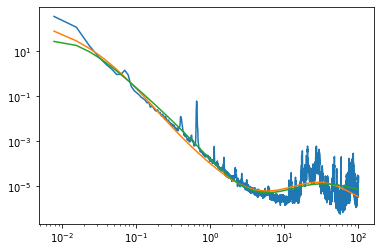

In [328]:
plt.loglog(f,abs(data))
plt.loglog(f,abs(tf_fits[2]))
plt.loglog(f,abs(tf_fits[6]))
# for tf_fit in tf_fits:
#     plt.loglog(abs(tf_fit))

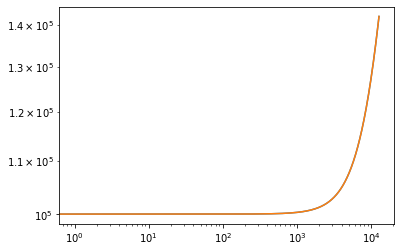

In [239]:
tfs = args2tf([1,2,3,4,5,1,5], f, data)
tfcontrol = args2tf([1,2,3,4,5,1,5], f, data)
tfs-tfcontrol
plt.loglog(abs(tfs))
plt.loglog(abs(tfcontrol))

In [240]:
tfs.dtype

dtype('complex128')

In [241]:
tfcontrol.dtype

dtype('complex128')

In [199]:
tf_fit = kontrol.model.fit.noise2zpk(f=f[1:], noise_data=data[1:], max_order=10, bounds=(min(f[1:])*1e-1, max(f[1:])))

/home/terrencetec/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


differential_evolution step 1: f(x)= 4.66743e+20
differential_evolution step 2: f(x)= 9.4409e+19
differential_evolution step 3: f(x)= 2.68974e+19
differential_evolution step 4: f(x)= 2.23256e+19
differential_evolution step 5: f(x)= 2.23256e+19
differential_evolution step 6: f(x)= 2.23256e+19
differential_evolution step 7: f(x)= 9.77878e+18
differential_evolution step 8: f(x)= 1.32515e+15
differential_evolution step 9: f(x)= 1.32515e+15
differential_evolution step 10: f(x)= 1.32515e+15
differential_evolution step 11: f(x)= 1.32515e+15
differential_evolution step 12: f(x)= 1.32515e+15
differential_evolution step 13: f(x)= 1.32515e+15
differential_evolution step 14: f(x)= 1.32515e+15
differential_evolution step 15: f(x)= 1.79334e+13
differential_evolution step 16: f(x)= 1.79334e+13
differential_evolution step 17: f(x)= 1.64581e+10
differential_evolution step 18: f(x)= 1.64581e+10
differential_evolution step 19: f(x)= 1.64581e+10
differential_evolution step 20: f(x)= 6.38895e+09
differenti

differential_evolution step 176: f(x)= 9.2389
differential_evolution step 177: f(x)= 9.23478
differential_evolution step 178: f(x)= 9.23249
differential_evolution step 179: f(x)= 9.22821
differential_evolution step 180: f(x)= 9.22473
differential_evolution step 181: f(x)= 9.22166
differential_evolution step 182: f(x)= 9.21355
differential_evolution step 183: f(x)= 9.19948
differential_evolution step 184: f(x)= 9.18151
differential_evolution step 185: f(x)= 9.1621
differential_evolution step 186: f(x)= 9.12734
differential_evolution step 187: f(x)= 9.12323
differential_evolution step 188: f(x)= 9.07683
differential_evolution step 189: f(x)= 9.07027
differential_evolution step 190: f(x)= 9.06517
differential_evolution step 191: f(x)= 9.06431
differential_evolution step 192: f(x)= 9.06431
differential_evolution step 193: f(x)= 9.06431
differential_evolution step 194: f(x)= 9.06431
differential_evolution step 195: f(x)= 9.06396
differential_evolution step 196: f(x)= 9.06396
differential_ev

differential_evolution step 351: f(x)= 4.11377
differential_evolution step 352: f(x)= 4.11376
differential_evolution step 353: f(x)= 4.11374
differential_evolution step 354: f(x)= 4.11372
differential_evolution step 355: f(x)= 4.11369
differential_evolution step 356: f(x)= 4.11369
differential_evolution step 357: f(x)= 4.11368
differential_evolution step 358: f(x)= 4.11368
differential_evolution step 359: f(x)= 4.11368
differential_evolution step 360: f(x)= 4.11366
differential_evolution step 361: f(x)= 4.11365
differential_evolution step 362: f(x)= 4.11364
differential_evolution step 363: f(x)= 4.11363
differential_evolution step 364: f(x)= 4.11362
differential_evolution step 365: f(x)= 4.11359
differential_evolution step 366: f(x)= 4.11358
differential_evolution step 367: f(x)= 4.11358
differential_evolution step 368: f(x)= 4.11353
differential_evolution step 369: f(x)= 4.11349
differential_evolution step 370: f(x)= 4.11347
differential_evolution step 371: f(x)= 4.11346
differential_

differential_evolution step 526: f(x)= 4.08929
differential_evolution step 527: f(x)= 4.08924
differential_evolution step 528: f(x)= 4.08917
differential_evolution step 529: f(x)= 4.08916
differential_evolution step 530: f(x)= 4.08916
differential_evolution step 531: f(x)= 4.08916
differential_evolution step 532: f(x)= 4.08916
differential_evolution step 533: f(x)= 4.08916
differential_evolution step 534: f(x)= 4.08914
differential_evolution step 535: f(x)= 4.08914
differential_evolution step 536: f(x)= 4.08914
differential_evolution step 537: f(x)= 4.08912
differential_evolution step 538: f(x)= 4.0891
differential_evolution step 539: f(x)= 4.0891
differential_evolution step 540: f(x)= 4.0891
differential_evolution step 541: f(x)= 4.0891
differential_evolution step 542: f(x)= 4.08908
differential_evolution step 543: f(x)= 4.08907
differential_evolution step 544: f(x)= 4.08904
differential_evolution step 545: f(x)= 4.08904
differential_evolution step 546: f(x)= 4.08904
differential_evol

differential_evolution step 701: f(x)= 4.08836
differential_evolution step 702: f(x)= 4.08836
differential_evolution step 703: f(x)= 4.08835
differential_evolution step 704: f(x)= 4.08835
differential_evolution step 705: f(x)= 4.08833
differential_evolution step 706: f(x)= 4.08832
differential_evolution step 707: f(x)= 4.0883
differential_evolution step 708: f(x)= 4.0883
differential_evolution step 709: f(x)= 4.0883
differential_evolution step 710: f(x)= 4.08829
differential_evolution step 711: f(x)= 4.08829
differential_evolution step 712: f(x)= 4.08829
differential_evolution step 713: f(x)= 4.08829
differential_evolution step 714: f(x)= 4.08829
differential_evolution step 715: f(x)= 4.08829
differential_evolution step 716: f(x)= 4.08829
differential_evolution step 717: f(x)= 4.08829
differential_evolution step 718: f(x)= 4.08829
differential_evolution step 719: f(x)= 4.08829
differential_evolution step 720: f(x)= 4.08829
differential_evolution step 721: f(x)= 4.08829
differential_evo

differential_evolution step 876: f(x)= 4.08816
differential_evolution step 877: f(x)= 4.08816
differential_evolution step 878: f(x)= 4.08816
differential_evolution step 879: f(x)= 4.08816
differential_evolution step 880: f(x)= 4.08816
differential_evolution step 881: f(x)= 4.08816
differential_evolution step 882: f(x)= 4.08816
differential_evolution step 883: f(x)= 4.08816
differential_evolution step 884: f(x)= 4.08816
differential_evolution step 885: f(x)= 4.08816
differential_evolution step 886: f(x)= 4.08816
differential_evolution step 887: f(x)= 4.08815
differential_evolution step 888: f(x)= 4.08815
differential_evolution step 889: f(x)= 4.08815
differential_evolution step 890: f(x)= 4.08815
differential_evolution step 891: f(x)= 4.08815
differential_evolution step 892: f(x)= 4.08815
differential_evolution step 893: f(x)= 4.08815
differential_evolution step 894: f(x)= 4.08815
differential_evolution step 895: f(x)= 4.08815
differential_evolution step 896: f(x)= 4.08815
differential_

In [193]:
tf_fit


7.875e-20 s^10 + 1.98e-16 s^9 + 2.099e-13 s^8 + 1.225e-10 s^7 + 4.299e-08 s^6 + 9.281e-06 s^5 + 0.001205 s^4 + 0.08666 s^3 + 2.759 s^2 + 11.53 s + 8.471
--------------------------------------------------------------------------------------------------------------------------------------------------------
    4.984e-18 s^10 + 1.141e-14 s^9 + 1.112e-11 s^8 + 6.015e-09 s^7 + 1.976e-06 s^6 + 0.0004036 s^5 + 0.0501 s^4 + 3.459 s^3 + 102.1 s^2 + 30.68 s + 1

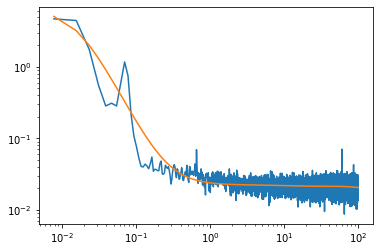

In [201]:
import matplotlib.pyplot as plt
_f = np.logspace(-6, 6, 1000000)
plt.loglog(f[1:],data[1:])
plt.loglog(f[1:], abs(tf_fit.horner(2*np.pi*1j*f[1:])[0][0]))

In [145]:
max(f)

100.0078125

In [144]:
tf_fit.pole()/2/np.pi

array([-1.01728215e+04  +0.j        , -1.01238103e+04+121.14422019j,
       -1.01238103e+04-121.14422019j, -1.00025157e+04+173.98511007j,
       -1.00025157e+04-173.98511007j, -9.87775794e+03+124.61894867j,
       -9.87775794e+03-124.61894867j, -9.82526033e+03  +0.j        ,
       -2.73932889e+02  +0.j        , -7.82236926e-04  +0.j        ])

In [61]:
data[1]

4.66451

In [22]:
tf_fit


2.536e-50 s^10 + 1.275e-43 s^9 + 2.807e-37 s^8 + 3.531e-31 s^7 + 2.777e-25 s^6 + 1.399e-19 s^5 + 4.409e-14 s^4 + 7.969e-09 s^3 + 0.0006383 s^2 + 1.733 s + 11.04
----------------------------------------------------------------------------------------------------------------------------------------------------------------
  5.799e-51 s^10 + 3.279e-44 s^9 + 8.243e-38 s^8 + 1.209e-31 s^7 + 1.139e-25 s^6 + 7.158e-20 s^5 + 2.999e-14 s^4 + 8.075e-09 s^3 + 0.001269 s^2 + 88.57 s + 1

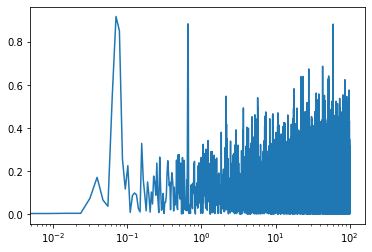

In [26]:
coh = dg.items.results.COH['K1:VIS-SR2_IP_BLEND_ACCL_IN1'].coherence[2]
plt.semilogx(f,coh)

In [161]:
choice = np.random.choice(np.logspace(np.log10(min(f[1:])), np.log10(max(f[1:])), len(f[1:])), 20)

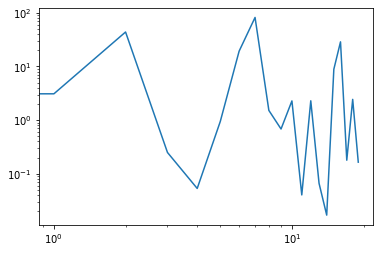

In [162]:
plt.loglog(choice)